In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [28]:
dfTrain = pd.read_csv('/content/sample_data/kendaraan_train.csv')
dfTest = pd.read_csv('/content/sample_data/kendaraan_test.csv')

In [29]:
dfTrain.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


### Poin A

#### Terdapat data customer pada pembelian kendaraan. Data berisi karakteristik customer yang berkaitan dengan ketertarikan customer untuk membeli kendaraan. Kami diminta untuk melakukan eksplorasi data dan juga membuat model data dengan menggunakan machine learning untuk mengetahui karakteristik customer apakah tertarik atau tidak membeli mobil baru

### Poin B
### Eksplorasi Data

#### Persentase data jenis kelamin customer

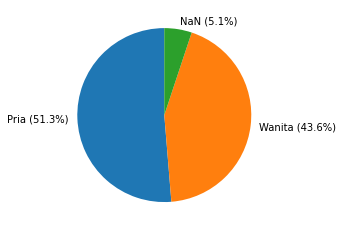

In [30]:
a = round((len(dfTrain[dfTrain['Jenis_Kelamin']=='Pria'])/len(dfTrain))*100,1)
b = round((len(dfTrain[dfTrain['Jenis_Kelamin']=='Wanita'])/len(dfTrain))*100,1)
c = round((len(dfTrain[(dfTrain['Jenis_Kelamin']!='Pria')&(dfTrain['Jenis_Kelamin']!='Wanita')])/len(dfTrain))*100,1)
y = np.array([a,b,c])
mylabels = ["Pria ({}%)".format(a), "Wanita ({}%)".format(b), "NaN ({}%)".format(c)]

plt.pie(y, labels = mylabels, startangle = 90)

plt.show()

In [31]:
TWanita = len(dfTrain[(dfTrain['Tertarik']==1)&(dfTrain['Jenis_Kelamin']=='Wanita')])/len(dfTrain[dfTrain['Jenis_Kelamin']=='Wanita'])
print('Jumlah Wanita yang tertarik beli mobil baru, yaitu {}% dari jumlah pembeli wanita'.format(round(TWanita*100,1)))

TPria = len(dfTrain[(dfTrain['Tertarik']==1)&(dfTrain['Jenis_Kelamin']=='Pria')])/len(dfTrain[dfTrain['Jenis_Kelamin']=='Pria'])
print('Jumlah Pria yang tertarik beli mobil baru, yaitu {}% dari jumlah pembeli pria'.format(round(TPria*100,1)))

Jumlah Wanita yang tertarik beli mobil baru, yaitu 10.3% dari jumlah pembeli wanita
Jumlah Pria yang tertarik beli mobil baru, yaitu 13.8% dari jumlah pembeli pria


#### Persentase ketertarikan pembelian menurut umur kendaraan
#### Dapat terlihat di bawah ini bahwa umur kendaraan 1-2 tahun yang lebih banyak peminat

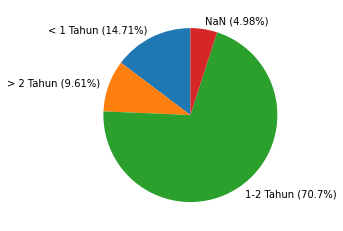

In [32]:
a = round((len(dfTrain[(dfTrain['Umur_Kendaraan']=='< 1 Tahun')&(dfTrain['Tertarik']==1)])/len(dfTrain[dfTrain['Tertarik']==1]))*100,2)
b = round((len(dfTrain[(dfTrain['Umur_Kendaraan']=='> 2 Tahun')&(dfTrain['Tertarik']==1)])/len(dfTrain[dfTrain['Tertarik']==1]))*100,2)
c = round((len(dfTrain[(dfTrain['Umur_Kendaraan']=='1-2 Tahun')&(dfTrain['Tertarik']==1)])/len(dfTrain[dfTrain['Tertarik']==1]))*100,2)
d = round((len(dfTrain[(dfTrain['Umur_Kendaraan']!='< 1 Tahun')&(dfTrain['Umur_Kendaraan']!='> 2 Tahun')&(dfTrain['Umur_Kendaraan']!='1-2 Tahun')&(dfTrain['Tertarik']==1)])/len(dfTrain[dfTrain['Tertarik']==1]))*100,2)
y = np.array([a,b,c,d])
mylabels = ["< 1 Tahun ({}%)".format(a), "> 2 Tahun ({}%)".format(b), "1-2 Tahun ({}%)".format(c), "NaN ({}%)".format(d)]

plt.pie(y, labels = mylabels, startangle = 90)

plt.show()

#### Jumlah null atau nan pada setiap column

In [33]:
dfTrain.isnull().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

#### Dari hasil eksplorasi data di atas, dapat dilihat bahwa ada banyak data NaN pada setiap column. Oleh karena itu kita akan melakukan data cleaning

### Data Cleaning & Preparation

In [34]:
# Melakukan standarisasi data, agar nilai antar column tidak jauh berbeda
dfTrain['Premi'] = dfTrain['Premi']/10000
dfTrain['Kanal_Penjualan'] = dfTrain['Kanal_Penjualan']/10
dfTrain['Lama_Berlangganan'] = dfTrain['Lama_Berlangganan']/10

dfTest['Premi'] = dfTest['Premi']/10000
dfTest['Kanal_Penjualan'] = dfTest['Kanal_Penjualan']/10
dfTest['Lama_Berlangganan'] = dfTest['Lama_Berlangganan']/10

# Menghapus row pada column-column selain Premi yang mempunya nilai Nan
a = dfTrain[dfTrain['Jenis_Kelamin'].notnull()]
b = a[a['Umur'].notnull()]
c = b[b['SIM'].notnull()]
d = c[c['Kode_Daerah'].notnull()]
e = d[d['Sudah_Asuransi'].notnull()]
f = e[e['Umur_Kendaraan'].notnull()]
g = f[f['Kendaraan_Rusak'].notnull()]
h = g[g['Kanal_Penjualan'].notnull()]
dfNew = h[h['Lama_Berlangganan'].notnull()]

# Mengisi nilai NaN pada coolumn Premi dengan rata-rata nilai Premi
dfNew = dfNew.fillna(dfNew['Premi'].mean())

#### Mengubah Semua string menjadi numerik agar dapat diolah ke dalam model

In [35]:
dfNew.loc[dfNew['Umur_Kendaraan']=='< 1 Tahun', 'Umur_Kendaraan'] = 1
dfNew.loc[dfNew['Umur_Kendaraan']=='> 2 Tahun', 'Umur_Kendaraan'] = 2
dfNew.loc[dfNew['Umur_Kendaraan']=='1-2 Tahun', 'Umur_Kendaraan'] = 3

dfNew.loc[dfNew['Kendaraan_Rusak']=='Pernah', 'Kendaraan_Rusak'] = 1
dfNew.loc[dfNew['Kendaraan_Rusak']=='Tidak', 'Kendaraan_Rusak'] = 0

dfNew.loc[dfNew['Jenis_Kelamin']=='Pria', 'Jenis_Kelamin'] = 1
dfNew.loc[dfNew['Jenis_Kelamin']=='Wanita', 'Jenis_Kelamin'] = 0

del dfNew['id']

dfNew = dfNew.astype(float)
dfNew = dfNew.reset_index(drop=True)

In [36]:
dfTest.loc[dfTest['Umur_Kendaraan']=='< 1 Tahun', 'Umur_Kendaraan'] = 1
dfTest.loc[dfTest['Umur_Kendaraan']=='> 2 Tahun', 'Umur_Kendaraan'] = 2
dfTest.loc[dfTest['Umur_Kendaraan']=='1-2 Tahun', 'Umur_Kendaraan'] = 3

dfTest.loc[dfTest['Kendaraan_Rusak']=='Pernah', 'Kendaraan_Rusak'] = 1
dfTest.loc[dfTest['Kendaraan_Rusak']=='Tidak', 'Kendaraan_Rusak'] = 0

dfTest.loc[dfTest['Jenis_Kelamin']=='Pria', 'Jenis_Kelamin'] = 1
dfTest.loc[dfTest['Jenis_Kelamin']=='Wanita', 'Jenis_Kelamin'] = 0

dfTest = dfTest.astype(float)
dfTest = dfTest.reset_index(drop=True)

#### Hasil akhir data train yang akan digunakan dalam model machine learning

In [37]:
dfNew.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.0,30.0,1.0,33.0,1.0,1.0,0.0,2.8029,15.2,9.7,0.0
1,1.0,48.0,1.0,39.0,0.0,2.0,1.0,2.5800,2.9,15.8,0.0
2,0.0,58.0,1.0,48.0,0.0,3.0,0.0,0.2630,12.4,6.3,0.0
3,1.0,21.0,1.0,35.0,1.0,1.0,0.0,2.2735,15.2,17.1,0.0
4,0.0,20.0,1.0,8.0,1.0,1.0,0.0,3.0786,16.0,3.1,0.0


### Poin C

### Persiapan

#### Memisahkan data. X merupakan variabel, dan Y merupakan labelnya

In [38]:
X_train = dfNew.drop('Tertarik', axis = 1)
Y_train = dfNew[['Tertarik']]

X_test = dfTest.drop('Tertarik', axis = 1)
Y_test = dfTest[['Tertarik']]

In [39]:
X_train = X_train.values
Y_train = Y_train.values

X_test = X_test.values
Y_test = Y_test.values


X_train = X_train.T
Y_train = Y_train.reshape(1, X_train.shape[1])

X_test = X_test.T
Y_test = Y_test.reshape(1, X_test.shape[1])

Y_train = Y_train.astype(int)

In [40]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(10, 180306)
(1, 180306)
(10, 47639)
(1, 47639)


#### Membangun Model

In [41]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def model(X, Y, learning_rate, iterations):
    
    m = X_train.shape[1]
    n = X_train.shape[0]
    
    W = np.zeros((n,1))
    B = 0
    
    cost_list = []
    
    for i in range(iterations):
        
        Z = np.dot(W.T, X) + B
        A = sigmoid(Z)
        
        # cost function
        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
        
        # Gradient Descent
        dW = (1/m)*np.dot(A-Y, X.T)
        dB = (1/m)*np.sum(A - Y)
        
        W = W - learning_rate*dW.T
        B = B - learning_rate*dB
        
        # Keeping track of our cost function value
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
            
    return W, B, cost_list
        

In [42]:
iterations = 1400
learning_rate = 0.0005
W, B, cost_list = model(X_train, Y_train, learning_rate = learning_rate, iterations = iterations)

cost after  0 iteration is :  0.6931471805599453
cost after  140 iteration is :  0.3769175125649186
cost after  280 iteration is :  0.36997073453293
cost after  420 iteration is :  0.36693053221951766
cost after  560 iteration is :  0.365299826247071
cost after  700 iteration is :  0.3642859212310791
cost after  840 iteration is :  0.3635688372406442
cost after  980 iteration is :  0.36300219512611576
cost after  1120 iteration is :  0.36251439838742366
cost after  1260 iteration is :  0.36206914718150535


### Poin D

#### Metode evaluasi 

In [43]:
def accuracy(X, Y, W, B):
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)
    #A = A > 0.5
    #A = np.array(A, dtype = 'int64')
    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100
    print("Accuracy of the model is : ", round(acc, 2), "%")
    return round(acc, 2)

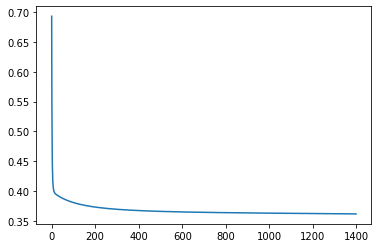

In [44]:
plt.plot(np.arange(iterations), cost_list)
plt.show()

In [45]:
accuracy(X_test, Y_test, W, B)

Accuracy of the model is :  78.59 %


78.59

# Experimen

In [24]:
akurasi = []
iterasi = []
l_rate = []
div_loop = int(input("Jumlah Looping: ")) #Akan digunakan untuk experimen dengan mengalikan/membagi iterasi dan learning rate
iterations = int(input("Input Jumlah Perulangan awal yang akan dilakukan pada model: ")) #Jumlah iterasi awal yang digunakan oleh model
learning_rate = float(input("Input Besar Learning Rate awal yang akan digunakan pada model: ")) #Besar learning rate yang digunakan oleh model
for i in  range(div_loop):
    print("")
    print("Jumlah Iterasi yang digunakan untuk model adalah : "+str(iterations))
    print("Besar Learning Rate yang digunakan untuk model adalah : "+str(learning_rate))
    W, B, cost_list = model(X_train, Y_train, learning_rate = learning_rate, iterations = iterations)
    accuracy(X_test, Y_test, W, B)
    
    iterations = round(iterations*div_loop)
    learning_rate = learning_rate/div_loop

Jumlah Looping: 3
Input Jumlah Perulangan awal yang akan dilakukan pada model: 1000
Input Besar Learning Rate awal yang akan digunakan pada model: 0.01

Jumlah Iterasi yang digunakan untuk model adalah : 1000
Besar Learning Rate yang digunakan untuk model adalah : 0.01
cost after  0 iteration is :  0.6931471805599453
cost after  100 iteration is :  0.3658309895929556
cost after  200 iteration is :  0.6945903180859861
cost after  300 iteration is :  0.4147305626840672
cost after  400 iteration is :  0.423065575699368
cost after  500 iteration is :  0.5295720554763708
cost after  600 iteration is :  0.41319101528011853
cost after  700 iteration is :  0.6555218000750741
cost after  800 iteration is :  0.6523091485474464
cost after  900 iteration is :  0.4093224601622041
Accuracy of the model is :  86.04 %

Jumlah Iterasi yang digunakan untuk model adalah : 3000
Besar Learning Rate yang digunakan untuk model adalah : 0.0033333333333333335
cost after  0 iteration is :  0.6931471805599453
co

####Kesimpulan

####Semakin besar iteration memiliki potensi meningkatkan akurasi karena model lebih banyak belajar, akan tetapi ada batas dimana perulangan tidak akan membuat model bertambah pintar. Sementara learning rate adalah kebalikannya, semakin kecil besar learning rate, maka akan membuat model semakin baik, akan tetapi ada batas dimana besar learning rate tidak akan membuat model bertambah pintar walaupun nilanya diperbesar. Learning rate yang memiliki nilai yang terlalu besar akan membuat model tidak dapat belajar dengan baik